# Programa para plotar a ocupação e uso do solo de cada cenario 

In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

In [2]:
def plot_map(shapefolder, grid_spc=5,extent=[-48.5068, -44.5378, -25.3771, -21.7681]): # Grade 3 com 1 km de resolucao
 proj = ccrs.PlateCarree(central_longitude=-46.5)
 trans = ccrs.PlateCarree()
 fig, ax = plt.subplots(figsize=(8, 6), facecolor='w', subplot_kw=dict(projection=proj))
#extent=[-47.7034, -45.7434, -24.4774, -22.6864]
 ax.set_extent(extent, crs=trans)
 grid_spc_lat=0.5
 grid_spc=0.5

 resol = '10m'  # use data at this scale
 land = cartopy.feature.NaturalEarthFeature('physical', 'land', \
    scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
 stt_prv = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines',
    scale='10m',facecolor='none')
 ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])

 ax.add_feature(land, linewidth=1.0 , facecolor='none', edgecolor='gray', zorder=3)
 ax.add_feature(ocean, linewidth=1.0, facecolor='none', edgecolor='gray', zorder=3)
 ax.add_feature(stt_prv, linewidth=1.0, facecolor='none', edgecolor='gray', alpha=1, zorder=3)
 gl = ax.gridlines(crs=trans, xlocs=np.arange(-180, 181, grid_spc),
                    ylocs=np.arange(-80, 90, grid_spc_lat), draw_labels=True)
		
 gl.top_labels = gl.right_labels = False
 gl.xlines = False
 gl.ylines = False
 gl.xformatter = LONGITUDE_FORMATTER
 gl.yformatter = LATITUDE_FORMATTER
 return fig, ax, trans

In [10]:
dataFile = 'filename.nc' # nome do arquivo
#Abrir arquivo
ds = xr.open_dataset(dataFile).isel(time=0)

In [11]:
lat = ds['lat']
lon = ds['lon']  # - 180
date_full = ds['time'].values
date = np.datetime_as_string(date_full, unit='s').partition('T')[0]
time = np.datetime_as_string(date_full, unit='s').partition('T')[2]
time = time.replace(":", "")[:-2]
title_plot = ('2015 land use')  
title_figure = ('Vtype')
vtype = ds['vtype2']

In [12]:
col_dict = {0: "darkturquoise",
            1: "lightskyblue",
            4: "lime",
            5: "lightgreen",
            6: "yellowgreen",
            7: "darkgreen",
            8: "yellow",
            10: "navajowhite",
            13: "orange",
            14: "darkgoldenrod",
            15: "salmon",
            18:"saddlebrown",
            19: "red",
            21: "darkred"}

In [13]:
cm = ListedColormap(colors=list(col_dict.values()))
cmaplist = [cm(i) for i in range(cm.N)]
cmaplist[0]

(0.0, 0.807843137254902, 0.8196078431372549, 1.0)

In [14]:
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)  # add one below the minimum
norm = matplotlib.colors.BoundaryNorm(norm_bins, len(col_dict), clip=True)
norm_bins

array([-0.5,  0.5,  1.5,  4.5,  5.5,  6.5,  7.5,  8.5, 10.5, 13.5, 14.5,
       15.5, 18.5, 19.5, 21.5])

In [17]:
labels = ["Ocean", "Inland water", "Evergreen N.T.", "Deciduous N. T.", "Deciduous B. T.", "Evergreen B.T,",
         "short grass", "Semi desert", "Deciduous Shrublands", "Mixed Woodland", "Crop/Mixed farming", 
         "Wooded grassland", "Urban", "Very urban"]
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

In [18]:
diff = norm_bins[1:] - norm_bins[:-1]
ticks = norm_bins[:-1] + diff / 2

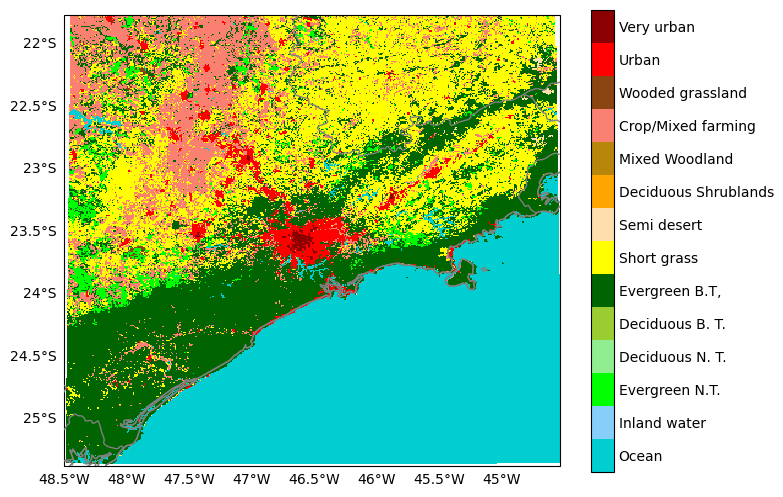

In [19]:
fig, ax, trans = plot_map(shapefolder=('...'))
vtype_cont = ax.pcolormesh(lon, lat, vtype, transform=trans, alpha=1.0,zorder=1, cmap=cm,norm=norm)
cbar = plt.colorbar(vtype_cont, ticks=ticks)
cbar.ax.set_yticklabels(["Ocean", "Inland water", "Evergreen N.T.", "Deciduous N. T.", "Deciduous B. T.", "Evergreen B.T,",
         "Short grass", "Semi desert", "Deciduous Shrublands", "Mixed Woodland", "Crop/Mixed farming", 
         "Wooded grassland", "Urban", "Very urban"])
cbar.ax.tick_params(which='major',size=0)
cbar.ax.tick_params(which='minor',size=0)
#plt.savefig((title_figure +
#                '_Grade3.png'), dpi=300, bbox_inches='tight')
plt.show()